In [10]:
###Import relevent classes
from Environment_Simulation import World
from Environment_Simulation import Animal
from Environment_Simulation import Carnivore
from Environment_Simulation import Omnivore
from Environment_Simulation import Herbivore
###Import other relevent libriaries
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import display, clear_output
import time
import matplotlib.colors as mcolors

"""
NOTE: for learning purposes I have made this simulation across three cells I strongly recommend initilising your world
and running a simulation with that world in the same cell otherwise If you try to re-run the simulation withought re-inilitizating a world
you will just run teh next x steps on the previously given world. 

run these cells in order to see how everything works
"""

#Make a list to store the animals you generate
Example_Animal_lst = []

### Use loops to add animals to the list
"""
Recall each animal has 6 charecteristics, 
Intial x/y position: currently set using random.randint(). Make sure that these are on the Board you make

Max Satiety: This sets the max amount of satiety a animal can have. Initial satiety is dependent on Max Satiety, set at 50 for all animals

Speed/Vision: This determins how far an anamial can move and see. Please have these set to the same number for any given animal other wise the code
might break. Currently set to  1/1 for herbivores, 2/2 for omnivores and 3/3 for carnivores. 

Lifespan:This determins how long any individuial animial can live before they die of old age. Animal of age 5 or younger don't reproduce. 
New animals start at age 0. currnently set to 20 for herbivores, 25 for omnivores and 30 for carnivores.
"""
for x in range(50): ## Creates 50 Herbivores
    Example_Animal_lst.append(Herbivore(random.randint(0, 19), random.randint(0, 19), 50, 1, 1, 20))
for x in range(5): ## Creates 5 Omnivores
    Example_Animal_lst.append(Omnivore(random.randint(0, 19), random.randint(0, 19), 50, 2, 2, 25))
for x in range(4):  ## Creates 4 Carnivores
    Example_Animal_lst.append(Carnivore(random.randint(0, 19), random.randint(0, 19), 50, 3, 3, 30))

### Create a world
"""
Each world has 4 Charecteristics
rows/cols: These are the number of rows and columns in the the board you make. In this case we have rows and columns numbered 0-19

environment: This is the initial enviornment of the world. Choose from (Jungle, Forest, Meadow, Savannah, Desert)
                - Jungle has most vegetation and water
                - Desert has least
It determins the starting amount of water and vegetation on each tile. 
It also determins how fast vegetation will grow on each tile each turn. The enviornment will change based on the current state of the board.
each turn it counts the number of tiles with vegetation in each range [0,10] [10,20] [20,30] [30,40] [40+] then changes the enviornment to the
range with the most cells. ex if more than half of the cells have an amount of vegetation between 30 and 40 then the environemnt will be
set to Forest. During an animation the current enviornment is dusplayed at the bottom of the animation.

animals: This accepts a list of animals. For this world I used the list Example_Animal_lst that was made earlier. Please ensure that your
list only contains Carnivores, Omnivores and Herbivores as using default animals will break the code.
"""
Example_world = World(rows=20, cols=20, environment='Jungle', animals = Example_Animal_lst)
Example_world2 = World(rows=20, cols=20, environment='Jungle', animals = list(Example_Animal_lst)) ### the list is so these two wolrd objecs are different

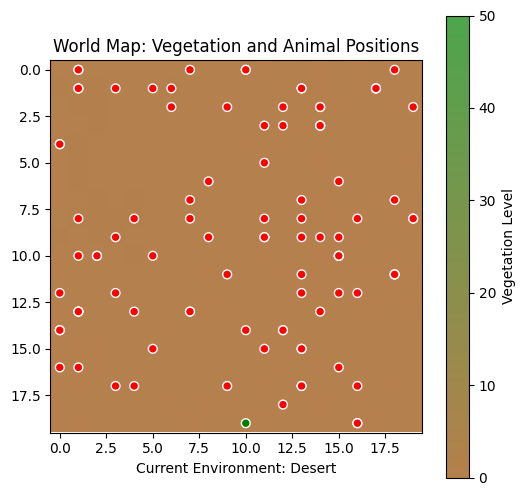

{'carn': 95, 'omni': 0, 'herb': 1}
[1.053125 0.853125 0.      ]


In [11]:
"""
There are two main functions that are used to run animations The first of these is .run_animation(time)
This is a function associated with the World Class so use it ball calling it with you world(in this case, Example_world)

This function accepts 1 argument, time. This accpts a posotive integre and determins the number of steps teh simulation is run for

This function returns nothing instead as part of the function it runs an animation that shows the simulation
For this simulation Herbivores are represent with green dots, Omnivores with yellow dots and Carnivores with red dots
The color of any given tile is dependent on the amount of vegetation and the scale is displayed at the side
The current enviornment is displayed at the bottom
"""
Example_world.run_animation(time=50) ### the time= is unnecessary, as this only has 1 argument you can also call it like this .run_animation(50)

####   there are two other functions of the world class that can be used after an animation to get information about the final state of the world

## Count animals returns a dictionary with the final number of Carnivores, Omnivores and Herbivores
an_dict = Example_world.count_animals()
print(an_dict)

## get tile returns a list with the water vegetation and meat on a specified tile. it accepts the x and y position of that tile
example_tile = Example_world.get_tile(9,9)
print(example_tile)

In [12]:
"""
There are two main functions that are used to run animations The first of these is .run_data(time)
This is a function associated with the World Class so use it ball calling it with you world(in this case, Example_world)

This function accepts 1 argument, time. This accpts a posotive integre and determins the number of steps the simulation is run for

This function returns data about the simulation when run but doesn't display anything.
The data is in the form of three nested lists formated like this data = [[][][]]
     The first nested list is a list from 0 to time represent the timestep
     The second nested list is a list of tuples containing the number of Carnivores, Omnivores and Herbivres in that order ex. (5,10,40)
     The third nested list is a list of tuples containing the average amount of water, vegitation and meat per tile in that order ex. (34.7, 30.02, 9.9)

This data can be used for graphing or other visulization of simulations. 
"""

data = Example_world2.run_data(time=50) ### the time= is unnecessary, as this only has 1 argument you can also call it like this .run_data(50)
time_step_list = data[0]
animal_step_lst = data[1]
enviornment_step_lst = data[2]
print(time_step_list)
print()
print(animal_step_lst)
print()
print(enviornment_step_lst)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

[(4, 5, 50), (0, 4, 26), (0, 4, 28), (0, 4, 27), (0, 4, 28), (0, 5, 30), (0, 5, 29), (0, 5, 33), (0, 5, 39), (0, 5, 40), (0, 5, 40), (0, 6, 42), (0, 5, 41), (0, 4, 41), (0, 4, 48), (0, 4, 50), (0, 4, 53), (0, 4, 53), (0, 5, 56), (0, 5, 62), (0, 5, 69), (0, 5, 74), (0, 5, 71), (0, 5, 73), (0, 6, 75), (0, 5, 85), (0, 5, 92), (0, 4, 101), (0, 4, 106), (0, 4, 107), (0, 5, 115), (0, 4, 123), (0, 4, 139), (0, 4, 146), (0, 4, 158), (0, 5, 160), (0, 6, 178), (0, 5, 193), (0, 6, 211), (0, 6, 227), (0, 6, 237), (0, 6, 253), (0, 7, 272), (0, 7, 299), (0, 7, 326), (0, 7, 350), (0, 7, 369), (0, 8, 391), (0, 8, 410), (0, 9, 416)]

[(44.99, 44.86, 0.0), (44.78, 45.12, 2.44), (45.26, 45.13, 2.33), (45.58, 45.12, 2.43), (45.86, 45.2, 2.3), (46.11, 45.33, 2.13), (46.35, 45.46, 2.0), (46.57, 45.63, 1.84), (46.67, 45

Running simulation for Jungle on 20x20 map...
Running simulation for Jungle on 50x50 map...
Running simulation for Jungle on 100x100 map...
Running simulation for Forest on 20x20 map...
Running simulation for Forest on 50x50 map...
Running simulation for Forest on 100x100 map...
Running simulation for Meadow on 20x20 map...
Running simulation for Meadow on 50x50 map...
Running simulation for Meadow on 100x100 map...
Running simulation for Savannah on 20x20 map...
Running simulation for Savannah on 50x50 map...
Running simulation for Savannah on 100x100 map...
Running simulation for Desert on 20x20 map...
Running simulation for Desert on 50x50 map...
Running simulation for Desert on 100x100 map...


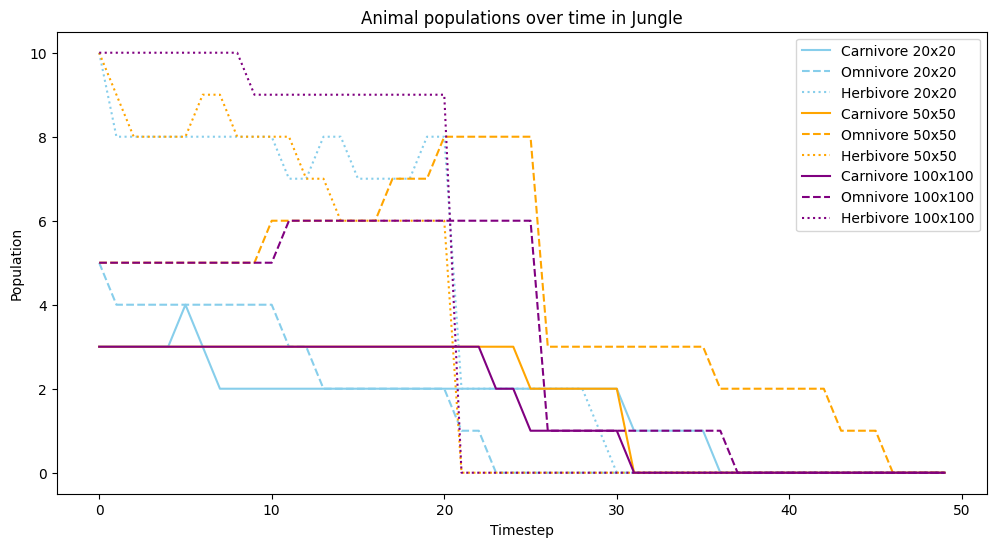

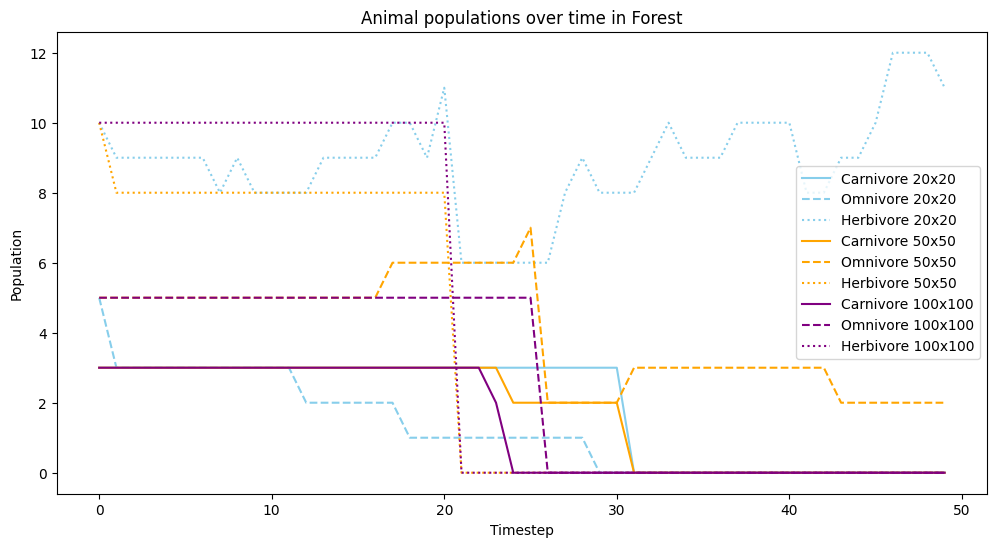

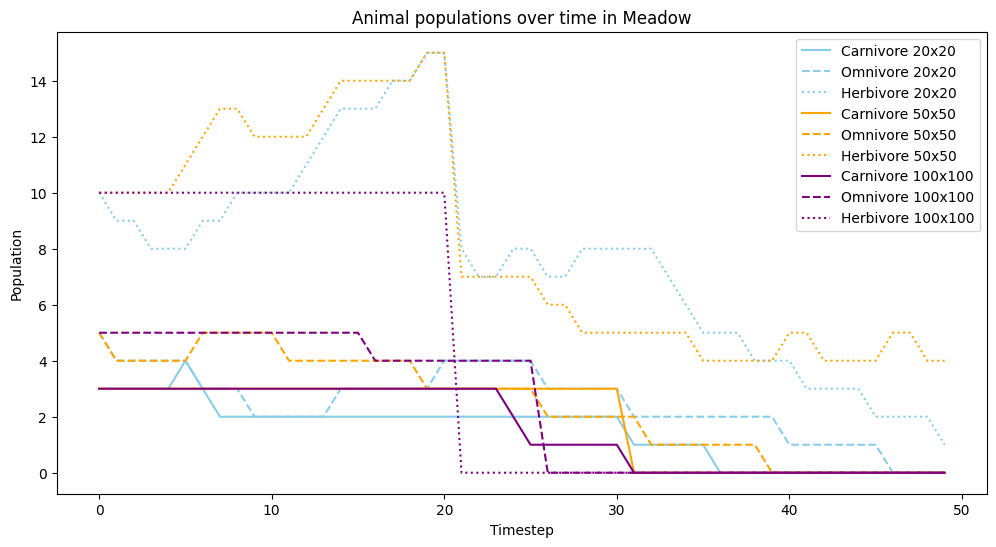

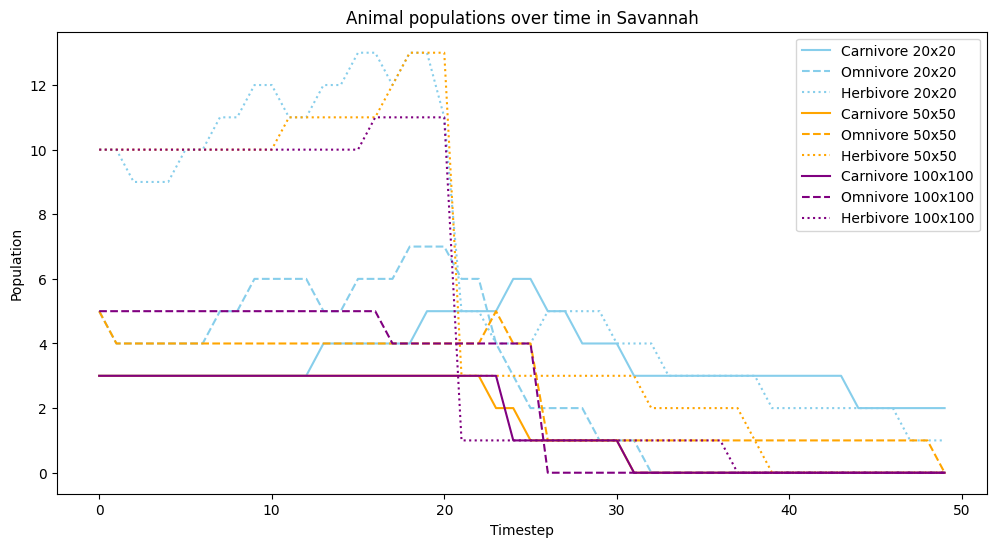

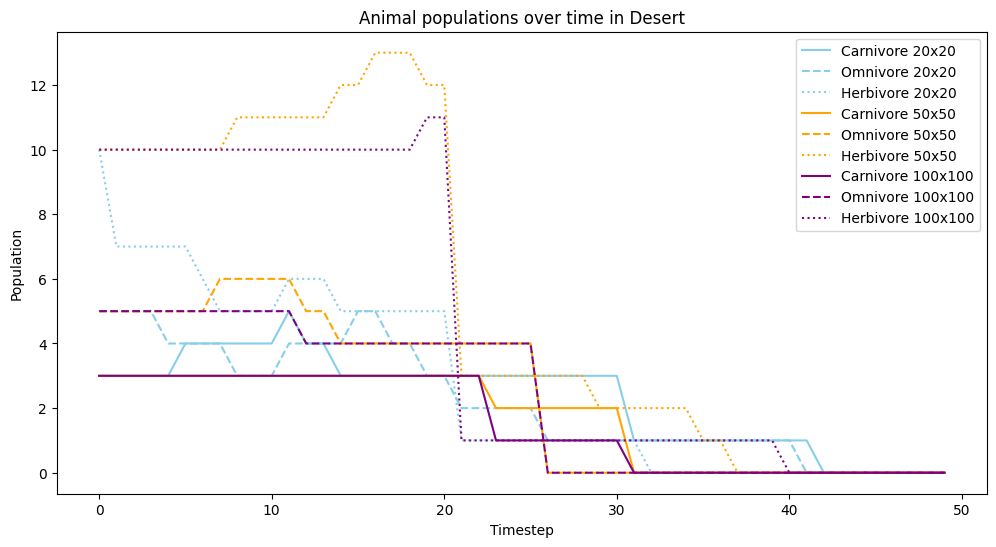

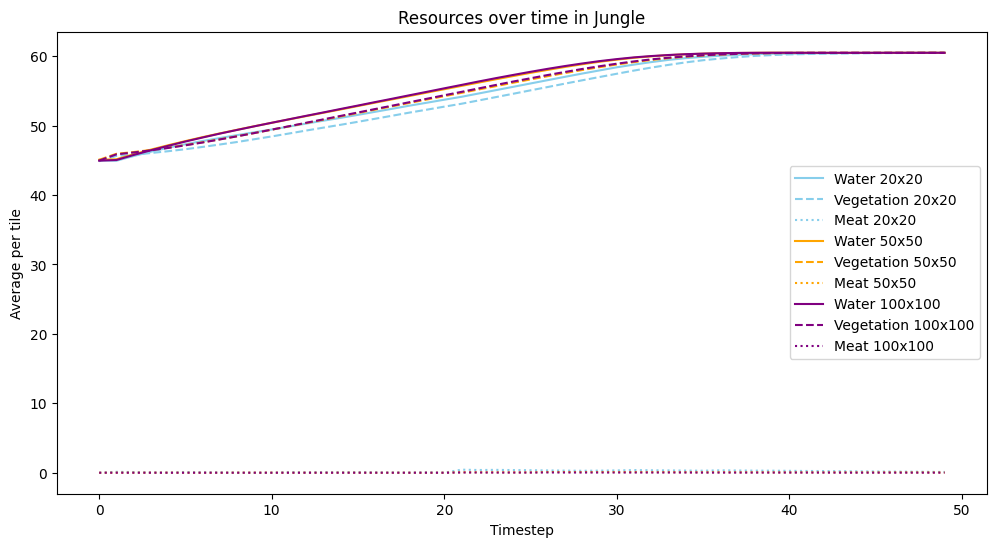

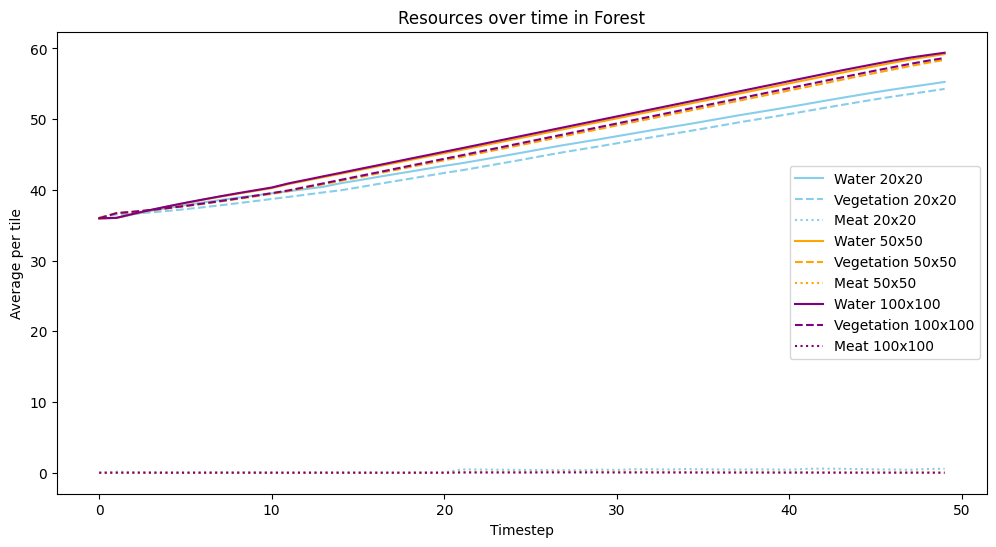

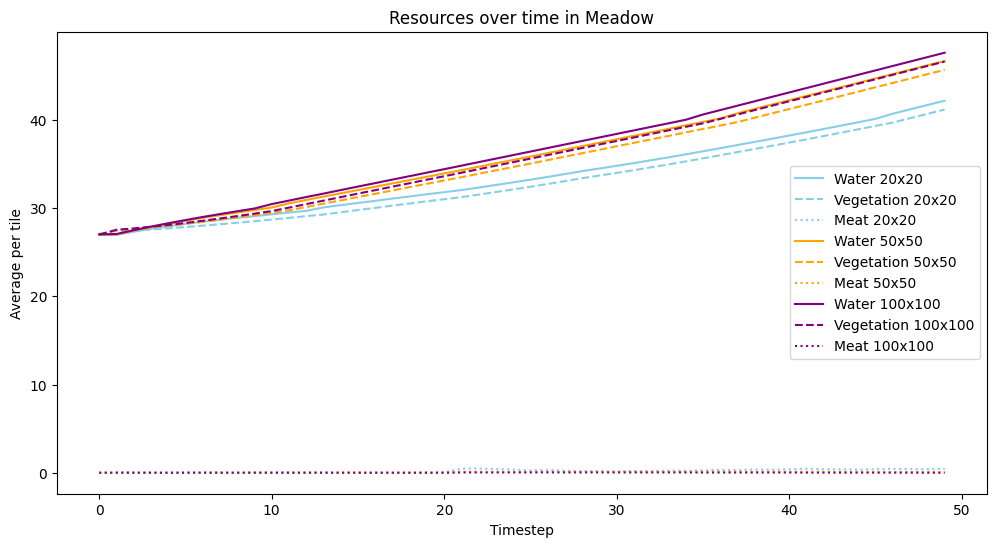

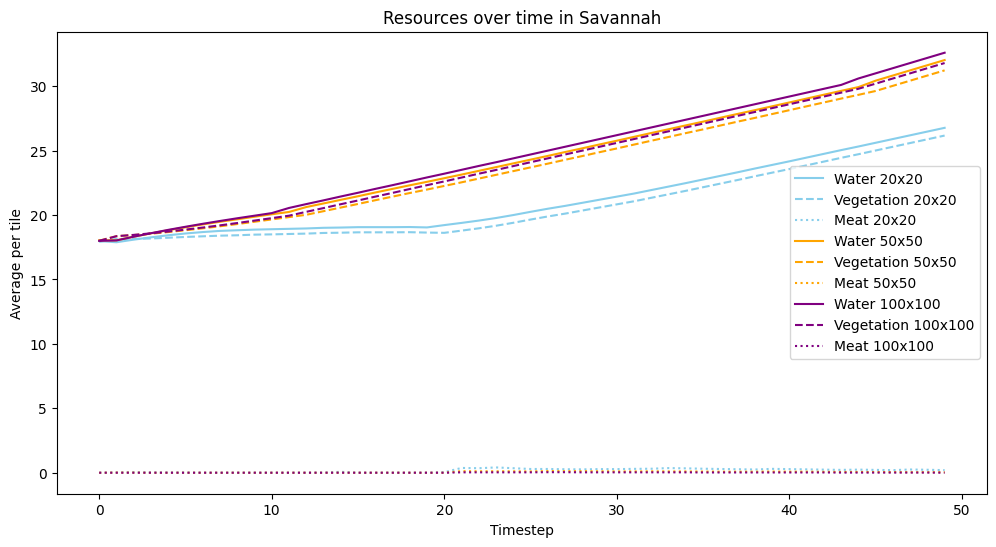

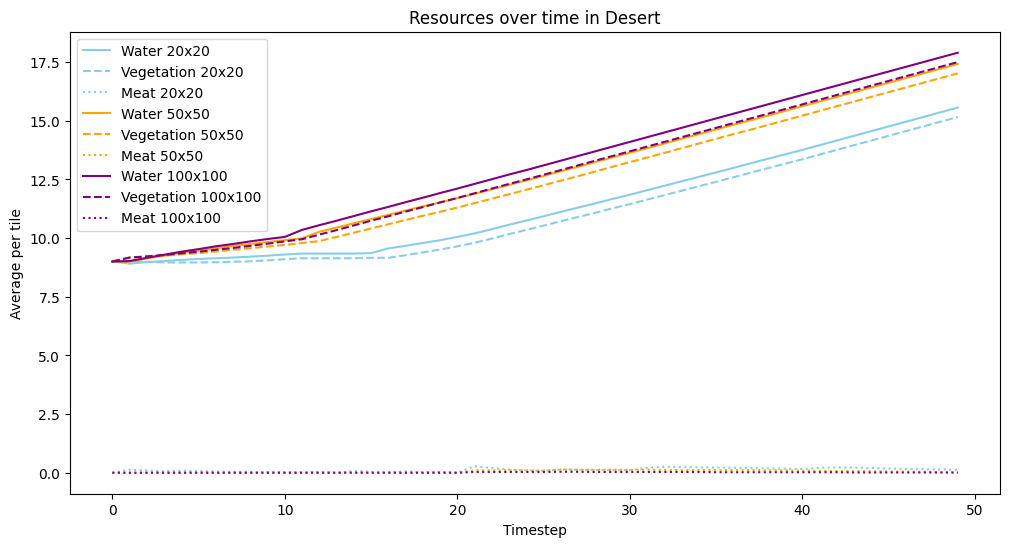

In [37]:

# parameters
environments = ['Jungle', 'Forest', 'Meadow', 'Savannah', 'Desert']
map_sizes = [(20, 20), (50, 50), (100, 100)]
timesteps = 50

# this is just to make a bunch of animals
def create_animals(rows, cols):
    animals = []
    # herb
    for _ in range(10):
        animals.append(Herbivore(posX=random.randint(0, rows-1),
                                 posY=random.randint(0, cols-1),
                                 max_satiety=50, speed=1, vision=1, lifespan=20))
    # omni
    for _ in range(5):
        animals.append(Omnivore(posX=random.randint(0, rows-1),
                                posY=random.randint(0, cols-1),
                                max_satiety=50, speed=2, vision=2, lifespan=25))
    # carn
    for _ in range(3):
        animals.append(Carnivore(posX=random.randint(0, rows-1),
                                 posY=random.randint(0, cols-1),
                                 max_satiety=50, speed=3, vision=3, lifespan=30))
    return animals

results = []

# runs the simulations 
for env in environments:
    for rows, cols in map_sizes:
        print(f"Running simulation for {env} on {rows}x{cols} map...")
        world = World(rows=rows, cols=cols, environment=env, animals=create_animals(rows, cols))
        data = world.run_data(time=timesteps)
        results.append({
            'environment': env,
            'size': (rows, cols),
            'data': data
        })

# code for plotting 
map_colors = { (20,20): 'skyblue', (50,50): 'orange', (100,100): 'purple' }

for env in environments:
    plt.figure(figsize=(12,6))
    for result in results:
        if result['environment'] == env:
            rows, cols = result['size']
            timesteps = result['data'][0]
            carn_pop = [t[0] for t in result['data'][1]]
            omni_pop = [t[1] for t in result['data'][1]]
            herb_pop = [t[2] for t in result['data'][1]]

            color = map_colors[(rows, cols)]
            plt.plot(timesteps, carn_pop, label=f"Carnivore {rows}x{cols}", linestyle='-', color=color)
            plt.plot(timesteps, omni_pop, label=f"Omnivore {rows}x{cols}", linestyle='--', color=color)
            plt.plot(timesteps, herb_pop, label=f"Herbivore {rows}x{cols}", linestyle=':', color=color)

    plt.xlabel("Timestep")
    plt.ylabel("Population")
    plt.title(f"Animal populations over time in {env}")
    plt.legend()
    plt.show()

# resources per environment 
for env in environments:
    plt.figure(figsize=(12,6))
    for result in results:
        if result['environment'] == env:
            rows, cols = result['size']
            timesteps = result['data'][0]
            avg_water = [t[0] for t in result['data'][2]]
            avg_veg   = [t[1] for t in result['data'][2]]
            avg_meat  = [t[2] for t in result['data'][2]]

            color = map_colors[(rows, cols)]
            plt.plot(timesteps, avg_water, label=f"Water {rows}x{cols}", linestyle='-', color=color)
            plt.plot(timesteps, avg_veg, label=f"Vegetation {rows}x{cols}", linestyle='--', color=color)
            plt.plot(timesteps, avg_meat, label=f"Meat {rows}x{cols}", linestyle=':', color=color)

    plt.xlabel("Timestep")
    plt.ylabel("Average per tile")
    plt.title(f"Resources over time in {env}")
    plt.legend()
    plt.show()